In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [72]:
df= pd.read_csv('data/clean_TAIPEI_diabetes.csv')

In [73]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10471 entries, 0 to 10470
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10471 non-null  int64  
 1   Pregnancies             10471 non-null  int64  
 2   PlasmaGlucose           10471 non-null  int64  
 3   DiastolicBloodPressure  10471 non-null  int64  
 4   TricepsThickness        10471 non-null  int64  
 5   SerumInsulin            10471 non-null  int64  
 6   BMI                     10471 non-null  float64
 7   DiabetesPedigree        10471 non-null  float64
 8   Age                     10471 non-null  int64  
 9   Diabetic                10471 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 818.2 KB
None


In [74]:
print ( df.isnull().sum())

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64


In [75]:
print (df.describe())

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.047100e+04  10471.000000   10471.000000            10471.000000   
mean   1.504674e+06      2.127781     105.799351               71.108968   
std    2.880059e+05      2.789957      30.883445               16.425644   
min    1.000069e+06      0.000000      44.000000               31.000000   
25%    1.256644e+06      0.000000      83.000000               57.000000   
50%    1.507697e+06      1.000000     103.000000               72.000000   
75%    1.754544e+06      3.000000     127.000000               85.000000   
max    1.999997e+06     14.000000     174.000000              112.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      10471.000000  10471.000000  10471.000000      10471.000000   
mean          28.405119    108.896953     31.272642          0.332687   
std           14.163763     86.627196      9.882741          0.270481   
min            7.000000

In [76]:
df.duplicated().sum()

np.int64(0)

In [77]:
df_cleaned=df.copy()

In [78]:
print (df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10471 entries, 0 to 10470
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10471 non-null  int64  
 1   Pregnancies             10471 non-null  int64  
 2   PlasmaGlucose           10471 non-null  int64  
 3   DiastolicBloodPressure  10471 non-null  int64  
 4   TricepsThickness        10471 non-null  int64  
 5   SerumInsulin            10471 non-null  int64  
 6   BMI                     10471 non-null  float64
 7   DiabetesPedigree        10471 non-null  float64
 8   Age                     10471 non-null  int64  
 9   Diabetic                10471 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 818.2 KB
None


In [79]:
print (df_cleaned.describe())

          PatientID   Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
count  1.047100e+04  10471.000000   10471.000000            10471.000000   
mean   1.504674e+06      2.127781     105.799351               71.108968   
std    2.880059e+05      2.789957      30.883445               16.425644   
min    1.000069e+06      0.000000      44.000000               31.000000   
25%    1.256644e+06      0.000000      83.000000               57.000000   
50%    1.507697e+06      1.000000     103.000000               72.000000   
75%    1.754544e+06      3.000000     127.000000               85.000000   
max    1.999997e+06     14.000000     174.000000              112.000000   

       TricepsThickness  SerumInsulin           BMI  DiabetesPedigree  \
count      10471.000000  10471.000000  10471.000000      10471.000000   
mean          28.405119    108.896953     31.272642          0.332687   
std           14.163763     86.627196      9.882741          0.270481   
min            7.000000

In [80]:
df_cleaned.columns

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

In [81]:
print(f"origin rows count: {df.shape[0]}")

def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_cols = [col for col in numeric_cols if col not in ["Age", "PatientID", "Pregnancies", "Diabetic"]]
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1 * IQR
        upper_bound = Q3 + 1 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
        print(f"{col}: there are {df.shape[0]} rows after removing outliers.")
    
    return df

df_cleaned = df.copy()

df_cleaned = remove_outliers_iqr(df_cleaned)

print(f"Final rows count: {df_cleaned.shape[0]}")

origin rows count: 10471
PlasmaGlucose: there are 10323 rows after removing outliers.
DiastolicBloodPressure: there are 10323 rows after removing outliers.
TricepsThickness: there are 10323 rows after removing outliers.
SerumInsulin: there are 10125 rows after removing outliers.
BMI: there are 10125 rows after removing outliers.
DiabetesPedigree: there are 9729 rows after removing outliers.
Final rows count: 9729


In [82]:
# Remove abnormal pregnancies values
print(f"Rows count before cleaning: {df_cleaned.shape[0]}")
df_cleaned = df_cleaned[df_cleaned['Pregnancies'] <= (df_cleaned['Age'] - 18)]
print(f"Rows count after cleaning: {df_cleaned.shape[0]}")

Rows count before cleaning: 9729
Rows count after cleaning: 9729


In [83]:
df_cleaned.to_csv('clean_TAIPEI_diabetes.csv', index=False, columns=list(df_cleaned.columns))
df = pd.read_csv('data/clean_TAIPEI_diabetes.csv')

In [84]:
X = df.drop(columns=["PatientID", "Diabetic"])  # All columns except the target
y = df["Diabetic"]                 # Target column

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

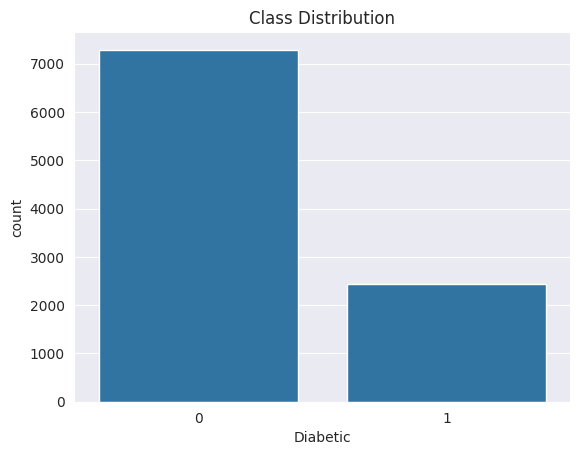

In [87]:
# Class balance
sns.countplot(x='Diabetic', data=df_cleaned)
plt.title("Class Distribution")
plt.show()

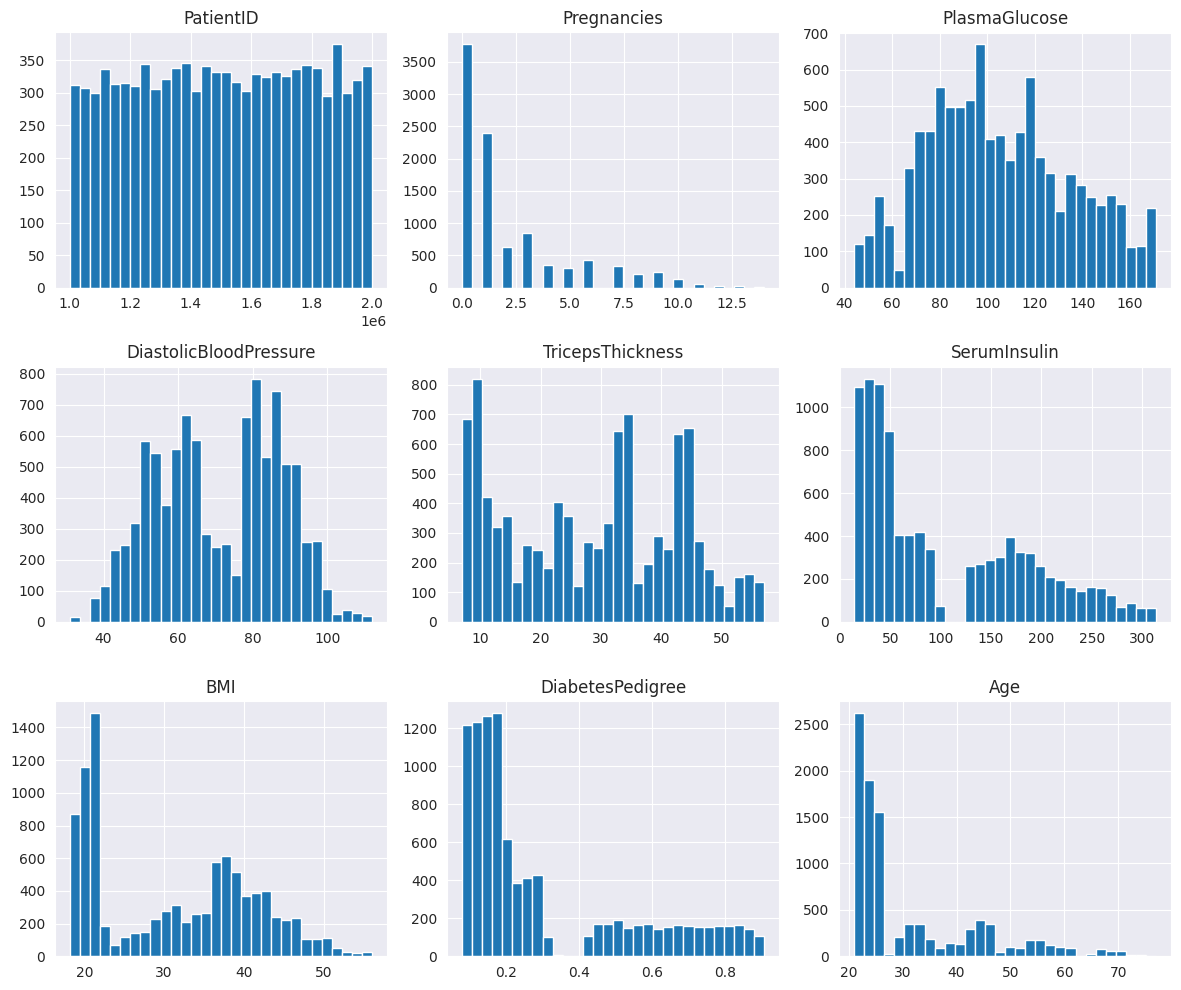

In [88]:
# Feature distribution
df_cleaned.drop(columns=['Diabetic']).hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

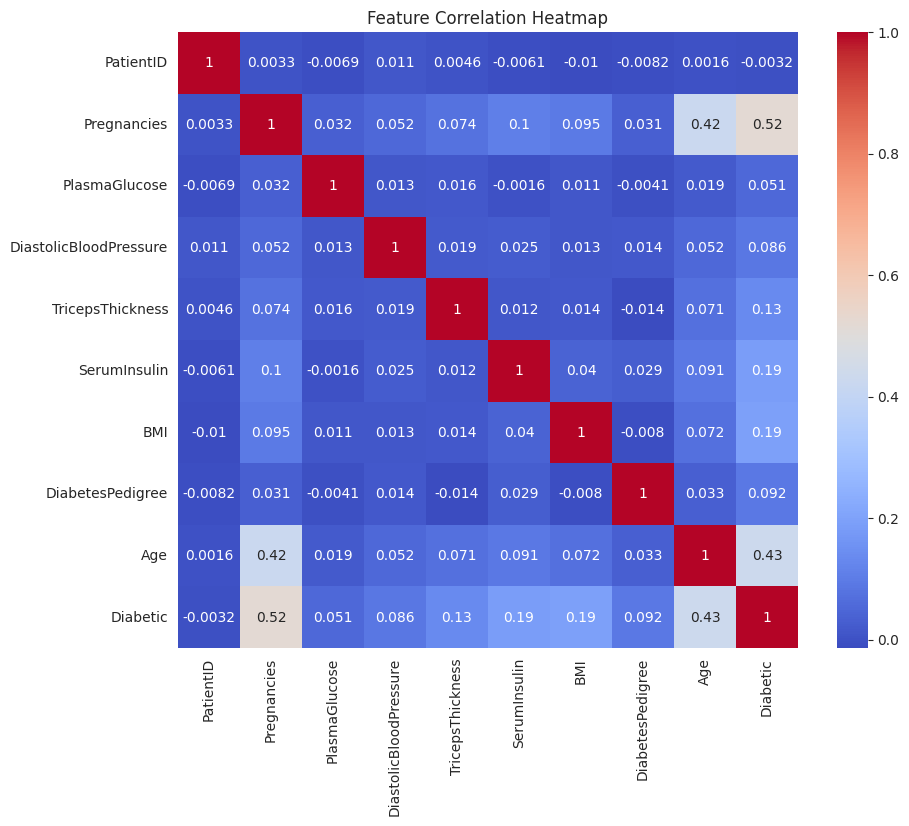

In [89]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

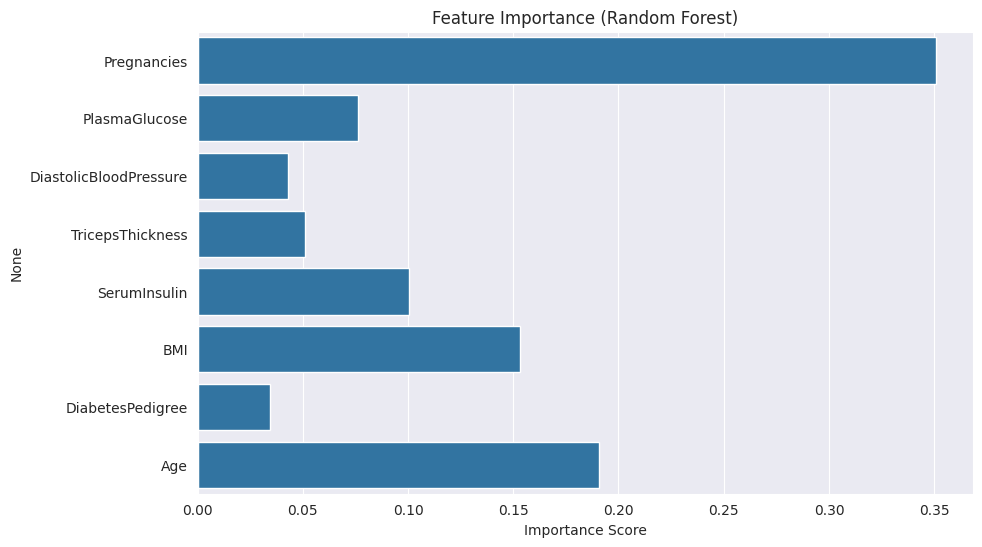

In [90]:
# Feature importance from Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_scaled, y)

importances = rfc.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [91]:
import pandas as pd
import numpy as np


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt


In [93]:
df = pd.read_csv("clean_TAIPEI_diabetes.csv")


In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [95]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [96]:
y_pred = rfc.predict(X_test)            # Binary predictions
y_proba = rfc.predict_proba(X_test)[:, 1]  # Probability of being diabetic (for ROC AUC)


In [97]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")


Accuracy: 95.08 %


In [98]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1497   43]
 [  60  495]]


In [99]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1540
           1       0.92      0.89      0.91       555

    accuracy                           0.95      2095
   macro avg       0.94      0.93      0.94      2095
weighted avg       0.95      0.95      0.95      2095



In [100]:
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", round(roc_auc, 4))


ROC AUC Score: 0.9829


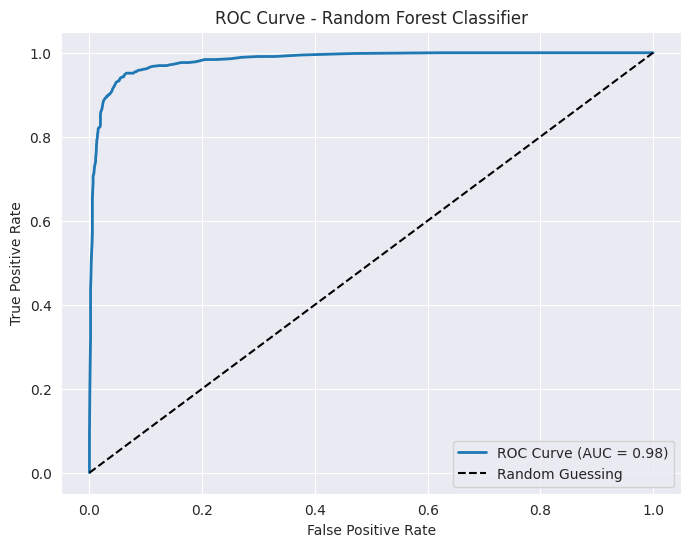

In [101]:
 ## the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [102]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("F1 Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9508353221957041
Confusion Matrix:
 [[1497   43]
 [  60  495]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1540
           1       0.92      0.89      0.91       555

    accuracy                           0.95      2095
   macro avg       0.94      0.93      0.94      2095
weighted avg       0.95      0.95      0.95      2095

ROC AUC Score: 0.982942552942553
F1 Score: 0.982942552942553


In [103]:
import joblib

In [104]:
joblib.dump(rfc, "../storage/models/rfc_model.pkl")

['../storage/models/rfc_model.pkl']